# 군집
- 비지도 학습
- 분류와 달리 정답 레이블이 없는 문제 -> 종속변수가 없음 (종속 변수가 있을 경우 분류)
    - `분류`의 대표적인 알고리즘: `K-NN`
    - `군집`의 대표적인 알고리즘: `K-Means`
- 데이터를 몇 개의 묶음(i.e., cluster클러스터)으로 나눌 것인지를 하이퍼파라미터로 결정해야 하며 이 값이 `K-Means`의 $k$가 된다
- 군집은 웬만하면 표준화 해줘야 된다: `MinMaxScaler`나 `Standard`
- 데이터 전처리 단계에서 라벨링을 위해 사용하기도 함

## 1. 패키지 참조

In [33]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sb
from matplotlib import pyplot as plt
from pandas import read_excel, DataFrame

from sklearn.cluster import KMeans # 군집을 위한 패키지
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

## 2. 데이터 가져오기
- **게임 유저 군집화**
    - 게임 이용시간(time spent)과 레벨(game level)을 활용하여 4개의 군집으로 나누기
    - 실제 게임회사에서 이상 유저(해킹 등)들을 잡아낼 때 사용하는 코드
    1. 오래해서 잘하는 집단
    2. 오래 해도 못하는 집단
    3. 잠깐 했는데 잘하는 집단
    4. 잠깐 해서 못하는 집단

In [19]:
origin = read_excel('https://data.hossam.kr/G02/game_usage.xlsx')
origin

,time spent,game level
0,39,944
1,55,705
2,29,757
3,59,999
4,7,109
...,...,...
95,47,939
96,50,485
97,13,916
98,79,235


## 3. 데이터 살펴보기
### 1) 게임 이용자의 분포 확인 (산점도 그래프)

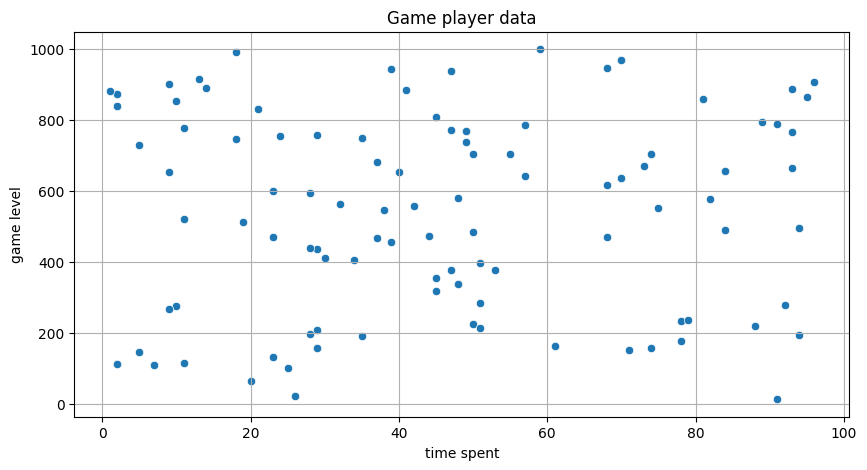

In [20]:
plt.figure(figsize = (10, 5))
sb.scatterplot(data=origin, x='time spent', y='game level')
plt.title('Game player data')
plt.xlabel('time spent')
plt.ylabel('game level')
plt.grid()
plt.show()
plt.close()

## 4. 군집화 모델
- `KMeans(n_clusters = n1, n_init = n2, max_iter=300, random_state = n3)`
    - n_clusters = 군집을 나눌 갯수
    - n_init = 몇 번 반복할지 (default = 10)
    - max_iter = (default = 300)
    - random_state = 랜덤값 고정

### 1) 모델 구현


In [21]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(origin)
labels = kmeans.predict(origin)
labels

array([3, 1, 1, 3, 0, 1, 2, 2, 0, 2, 3, 1, 0, 2, 3, 0, 1, 0, 3, 2, 1, 3,
       0, 1, 0, 3, 1, 0, 2, 2, 1, 1, 2, 0, 1, 1, 2, 0, 0, 3, 0, 1, 3, 1,
       3, 1, 1, 2, 1, 0, 2, 0, 0, 0, 2, 3, 0, 1, 3, 2, 0, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 3, 2, 0, 0, 3, 0, 3, 1, 0, 2, 0, 1, 2, 3, 0, 2, 1, 2,
       0, 0, 1, 1, 2, 1, 3, 3, 2, 3, 0, 2], dtype=int32)

### 2) 결과를 원본 데이터프레임과 병합

In [22]:
df1 = origin.copy()
df1['label'] = labels
df1

,time spent,game level,label
0,39,944,3
1,55,705,1
2,29,757,1
3,59,999,3
4,7,109,0
...,...,...,...
95,47,939,3
96,50,485,2
97,13,916,3
98,79,235,0


### 3) 결과 시각화

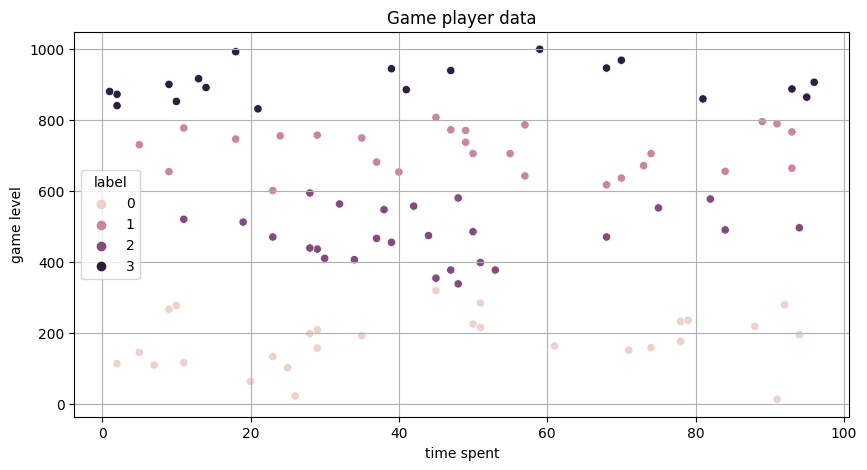

In [23]:
plt.figure(figsize = (10, 5))
sb.scatterplot(data=df1, 
               x='time spent',
               y='game level',
               hue='label')
plt.title('Game player data')
plt.xlabel('time spent')
plt.ylabel('game level')
plt.grid()
plt.show()
plt.close()

## 5. 데이터 표준화 적용

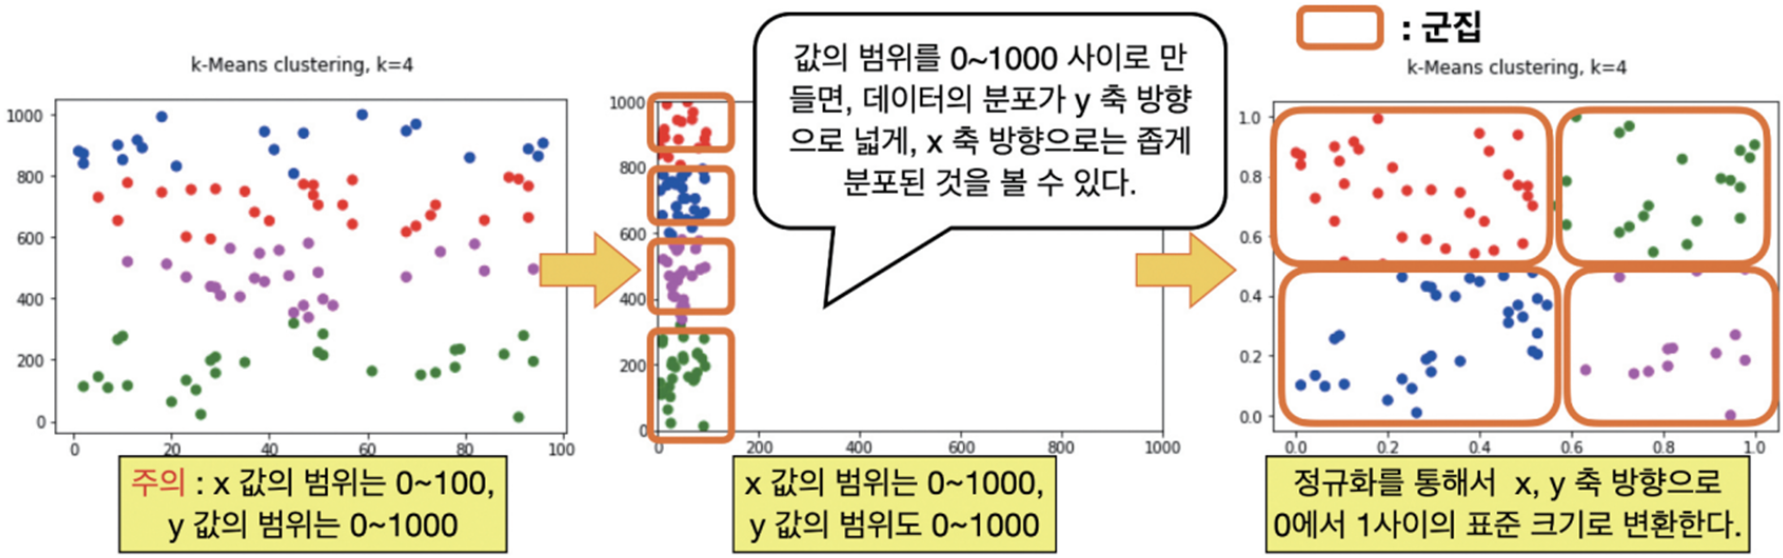

In [7]:
from IPython.display import Image, display
display(Image('image10_표준화중요성.png'))

### 1) 최대, 최솟값 스케일링
- `MinMaxScaler()`

In [24]:
scaler = MinMaxScaler()
scaler.fit(origin)
n_data = scaler.transform(origin)

# 결과 확인
열0평균 = n_data[:,0].mean() # 모든 행에 대해 0번째 열에 대한 평균
열1평균 = n_data[:,1].mean() # 모든 행에 대해 1번째 열에 대한 평균
print('각 열의 평균: ', 열0평균, 열1평균)
print('각 열의 최솟값: ', n_data[:,0].min(), n_data[:,1].min())
print('각 열의 최댓값: ', n_data[:,0].max(), n_data[:,1].max())

각 열의 평균:  0.4731578947368421 0.5324949290060852
각 열의 최솟값:  0.0 0.0
각 열의 최댓값:  1.0 1.0


> 최솟값과 최댓값이 0과 1 사이에 있으므로 표준화 잘 된 것을 확인

### 2) 스케일링의 결과를 군집

In [25]:
kmeans = KMeans(n_clusters = 4, n_init=10, max_iter = 300, random_state=777)
kmeans.fit(n_data)
labels = kmeans.predict(n_data)
labels

array([3, 1, 3, 1, 0, 3, 0, 0, 0, 0, 3, 1, 0, 0, 1, 0, 1, 0, 3, 3, 1, 1,
       2, 1, 0, 3, 3, 0, 0, 0, 1, 3, 0, 0, 1, 3, 0, 0, 0, 3, 0, 1, 3, 1,
       1, 1, 3, 0, 1, 2, 0, 2, 2, 0, 1, 3, 0, 3, 1, 1, 2, 1, 1, 0, 0, 1,
       0, 2, 0, 3, 3, 1, 0, 0, 1, 2, 3, 3, 0, 0, 0, 1, 0, 3, 2, 1, 3, 0,
       0, 2, 3, 1, 0, 3, 1, 3, 0, 3, 2, 0], dtype=int32)

### 3) 표준화된 군집 결과 시각화
- 먼저 편리한 시각화를 위한 데이터프레임 생성

In [26]:
df2 = DataFrame(n_data, columns = origin.columns)
df2['label'] = labels
df2

,time spent,game level,label
0,0.400000,0.944219,3
1,0.568421,0.701826,1
2,0.294737,0.754564,3
3,0.610526,1.000000,1
4,0.063158,0.097363,0
...,...,...,...
95,0.484211,0.939148,3
96,0.515789,0.478702,0
97,0.126316,0.915822,3
98,0.821053,0.225152,2


- 시각화

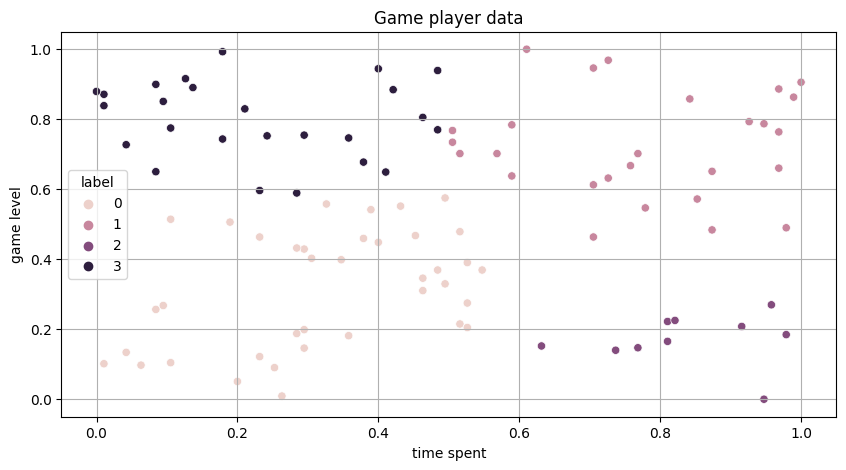

In [27]:
plt.figure(figsize = (10, 5))
sb.scatterplot(data=df2, 
               x='time spent',
               y='game level',
               hue='label')
plt.title('Game player data')
plt.xlabel('time spent')
plt.ylabel('game level')
plt.grid()
plt.show()
plt.close()

## 6. 군집의 평가
- 최적의 클러스터 수 알아내기
### 1) Inertia
- : K-Means 클러스터링의 성능 지표 
- : 성능 score라고 생각하면 됨
- `kmeans.inertia_`
- 각 샘플과 중점이 이동하는 자취 사이의` 평균 제곱거리 측정값`
- 한 번의 결과로 그 결과가 정답 (i.e., '한 번 돌려보고 나온 성능지표값을 보고 이 만큼의 성능이 있다')이라고 보는 것은 좋은 방법이 아니다
- 이너셔값은 클러스터 수와 `반비례 관계`
- 클러스터 수를 늘려가면서 반복적으로 실행하면 값이 점점 작아진다
- 클러스터 수가 늘어감에 따라 이너셔가 `급격히 감소`하고, 어느 지점부터는 완만하게 감소하는 지점이 생기는데, 이 지점이 `최적 클러스터 수`를 의미한다. 
    - 이 지점을 `앨보우(Elbow)`라고 부른다.

In [31]:
iner = [] # inertia값을 저장할 리스트
for k in range(2, 11): # 클러스터가 1개인 것은 의미가 없으므로 2부터 시작
    kmeans = KMeans(n_clusters = k, random_state=777)
    kmeans.fit(n_data)
    iner.append(kmeans.inertia_)
iner

[10.150300754112475,
 6.184178180480311,
 4.27870825868831,
 3.1342691797329554,
 2.244563434249514,
 1.8141504615008555,
 1.4833082834444848,
 1.2947314814417967,
 1.187736964142487]

- inertia 시각화

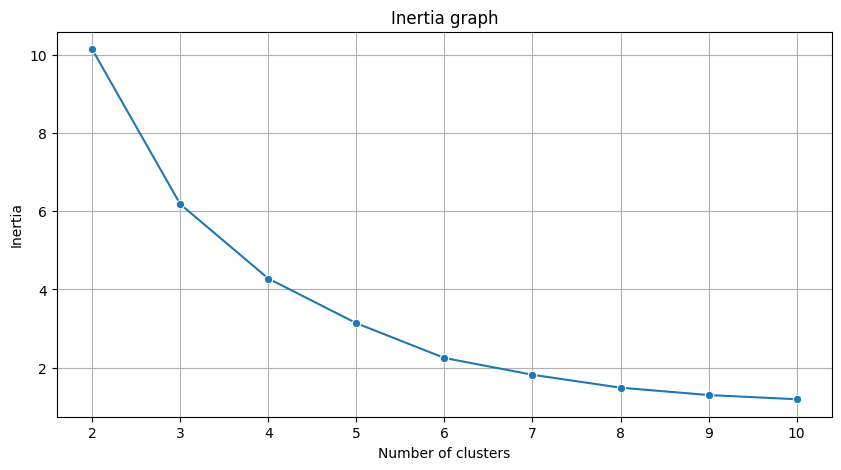

In [32]:
plt.figure(figsize = (10, 5))
sb.lineplot(x=range(2, 11), y=iner, marker='o')
plt.title('Inertia graph')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()
plt.close()

> x축의 값이 `4 또는 6인 지점부터 감소가 완만하게 진행`되는 것으로 보인다. 
> 
> 그러므로 `최적의 클러스트 수는 4~6 사이`이라고 판단할 수 있다

### 2) 실루엣 점수 (계수)
- 각 군집간의 거리가 얼마나 효율적으로 분리되었는지를 나타내는 지표
- 효율적 분리: 어떤 한 점이 다른 군집과는 멀리 떨어져 있고, 동일 군집끼리는 서로 가깝게 잘 뭉쳐있다는 의미
- 개별 데이터가 같은 군집과는 얼마나 가깝고, 다른 군집의 데이터와는 얼마나 분리되어 있는가를 나타내는 값
- sklearn은 `전체 실루엣 점수의 평균값`을 반환하는 `silhouette_score()` 함수를 제공한다
    - 리턴값은 `-1 ~ 1`의 범위를 가지며 `1에 가까울수록 좋은 군집`으로 본다
    - 리턴값이 `0`인 경우 클러스터가 겹치는 것을 의미
    - 리턴값이 `음수 값`인 경우 샘플이 `잘못된 클러스터에 할당`되었음을 의미

In [34]:
?silhouette_score

Signature:
silhouette_score(
    X,
    labels,
    *,
    metric='euclidean',
    sample_size=None,
    random_state=None,
    **kwds,
)
Docstring:
Compute the mean Silhouette Coefficient of all samples.

The Silhouette Coefficient is calculated using the mean intra-cluster
distance (``a``) and the mean nearest-cluster distance (``b``) for each
sample.  The Silhouette Coefficient for a sample is ``(b - a) / max(a,
b)``.  To clarify, ``b`` is the distance between a sample and the nearest
cluster that the sample is not a part of.
Note that Silhouette Coefficient is only defined if number of labels
is ``2 <= n_labels <= n_samples - 1``.

This function returns the mean Silhouette Coefficient over all samples.
To obtain the values for each sample, use :func:`silhouette_samples`.

The best value is 1 and the worst value is -1. Values near 0 indicate
overlapping clusters. Negative values generally indicate that a sample has
been assigned to the wrong cluster, as a different cluster is more s

#### 클러스터의 수를 4로 지정했을 때 실루엣을 활용한 성능 점수

In [41]:
kmeans = KMeans(n_clusters=4, random_state=777)
kmeans.fit(n_data)
y_pred = kmeans.predict(n_data)
score = silhouette_score(n_data, y_pred)

print('실루엣 점수: {:0.3f}'.format(score))

실루엣 점수: 0.414


#### 가장 높은 실루엣 점수를 가진 클러스트 수 (k)를 구하기 위한 반복문

In [42]:
silhouette_list = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, random_state=777)
    kmeans.fit(n_data)
    y_pred = kmeans.predict(n_data)
    score = silhouette_score(n_data, y_pred) # 전체 실루엣 점수의 평균값을 추출
    silhouette_list.append(score)
silhouette_list

[0.3617202800675718,
 0.3947341710593447,
 0.4144891907182965,
 0.43187959039495666,
 0.4654413077051131,
 0.4581607045900181,
 0.46061321951846396,
 0.46297169733084387,
 0.4313333259160699]

- 실루엣 점수들 시각화

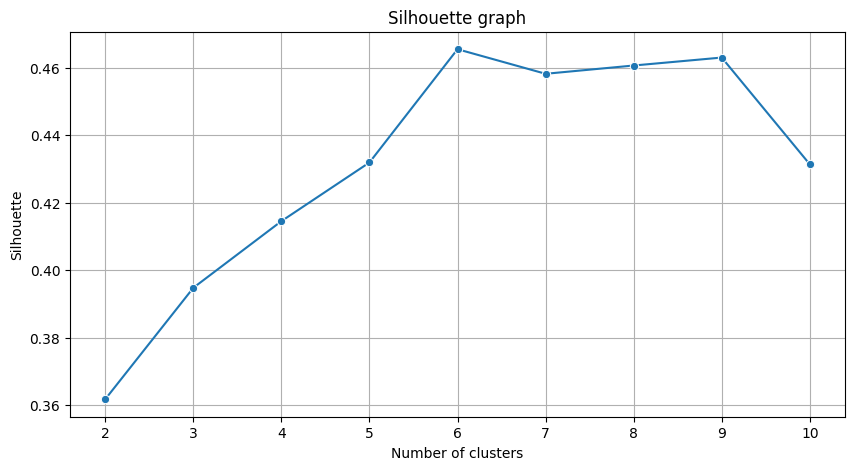

In [43]:
plt.figure(figsize = (10, 5))
sb.lineplot(x=range(2, 11), y=silhouette_list, marker='o')
plt.title('Silhouette graph')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette')
plt.grid()
plt.show()
plt.close()

> `최적의 클러스터 수는 6`이라고 볼 수 있다.

## 7. 최종 군집 결과
- 실루엣 점수가 가장 높은 `6개의 군집`으로 클러스터링을 수행

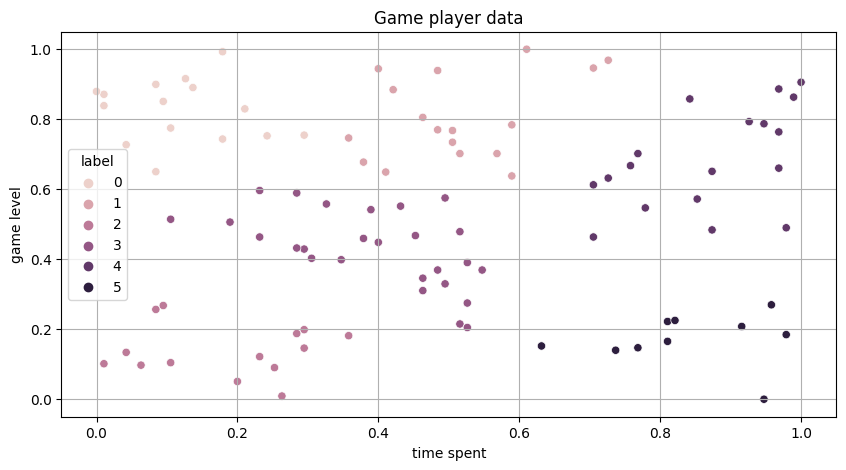

In [44]:
kmeans = KMeans(n_clusters = 6, 
                n_init=10,
                max_iter=300,
                random_state=777)
kmeans.fit(n_data)
labels = kmeans.predict(n_data)

df3 = DataFrame(n_data, columns = origin.columns)
df3['label'] = labels

plt.figure(figsize = (10, 5))
sb.scatterplot(data = df3,
               x='time spent',
               y='game level',
               hue='label')
plt.title('Game player data')
plt.xlabel('time spent')
plt.ylabel('game level')
plt.grid()
plt.show()
plt.close()

> 이 클러스터링을 입지 선정에 많이 사용한다
> 
> 위도 경도를 구해서 지도 위에 뿌리는 방식으로